In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

In [2]:
# Load cosine data
x_train = np.load(file='../순환신경망/x_train_cos.npy')
x_test = np.load(file='../순환신경망/x_test_cost.npy')
y_train = np.load(file='../순환신경망/y_train_cos.npy')
y_test = np.load(file='../순환신경망/y_test_cos.npy')

print(f"x_train의 shape : {x_train.shape},  y_train의 shape : {y_train.shape}")
print(f"x_test의 shape : {x_test.shape}, y_test의 shape : {y_test.shape}")

x_train의 shape : (315, 10, 1),  y_train의 shape : (315, 1)
x_test의 shape : (36, 10, 1), y_test의 shape : (36, 1)


#### Building the SimpleRNN model on cosine data

In [5]:
model = Sequential()
# SimpleRNN층을 사용하려면 반드시 input_shape를 명시해줘야 한다.
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=12)

Epoch 1/100
27/27 [==============================] - 3s 9ms/step - loss: 0.2423
Epoch 2/100
27/27 [==============================] - 0s 9ms/step - loss: 0.1037
Epoch 3/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0897
Epoch 4/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0769
Epoch 5/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0723
Epoch 6/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0676
Epoch 7/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0660
Epoch 8/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0643
Epoch 9/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0682
Epoch 10/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0660
Epoch 11/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0654
Epoch 12/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0662
Epoch 13/100
27/27 [===============

In [7]:
model.evaluate(x_test, y_test, verbose=0)

0.048976998776197433

2/2 [==============================] - 0s 7ms/step
36


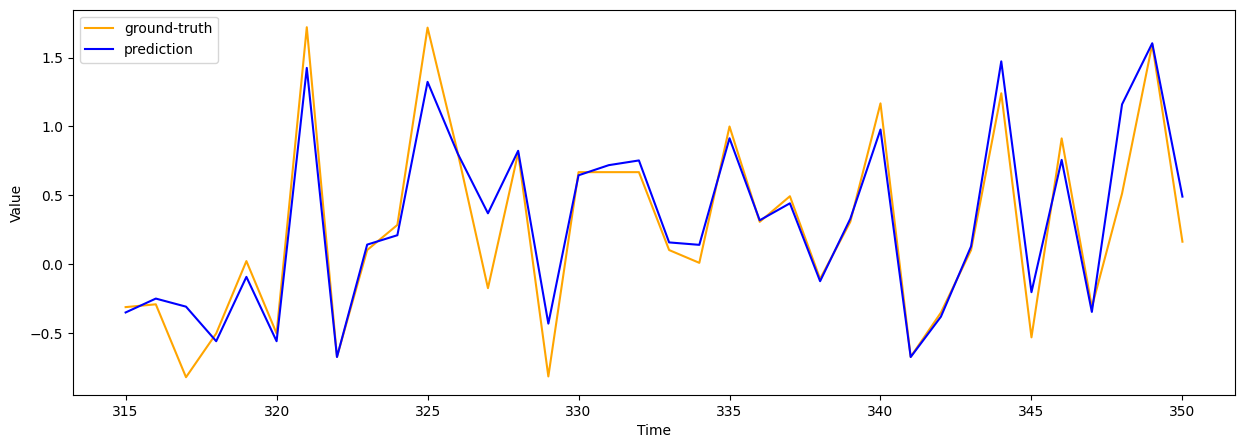

In [10]:
# Plotting the prediction
pred = model.predict(x_test)
print(len(pred))

pred_range = np.arange(len(y_train), len(y_train)+len(pred))

plt.figure(figsize=(15, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()